## LINEAR REGRESSION
We have an input vector $X^T=(X_1,...,X_p)$ and want to predict a real-valued output $Y$.The linear regression model has the form:

$$f(X) = \beta_0 + \sum_{j=1}^p {X_j\beta_j}$$

Note that we can also write the above equation in the following form assuming $X_0 = 1$

$$f(X) = \sum_{j=0}^p {X_j\beta_j}$$

 Typically we have a set of training data $(x_1, y_1)...(x_N, y_n)$ from which to estimate the parameters $\beta$. The most popular estimation method is *least squares*, in which we pick $\beta$ to minimize the residual sum of squares, (3.2):
$$ 
\begin{align}
RSS(\beta)&=\sum_{i=1}^N(y_i-f(x_i))^2\\
&=\sum_{i=1}^N(y_i-\sum_{j=0}^p{x_{ij}\beta_j})^2
\end{align}
$$

Let's rewrite $RSS(\beta)$ in matrix form:
$$RSS(\beta)=(\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta)$$

Differentiating with respect to $\beta$ we obtain:
$$
\begin{align}
\frac{\partial{RSS}}{\partial\beta} = -2\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)
\end{align}
$$

Assuming that **X** has full column rank, and hence the second derivative is positive definite:
$$\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta)=0$$

and the unique solution is:
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

The predicted value at an input vector $x_0$ are given by $\hat{f}(x_0)=(1:x_0)^T\hat{\beta}$:

$$\hat{y}=\mathbf{X}\hat{\beta}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

The matrix $\mathbf{H}=\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is sometimes called the "hat" matrix.

### Train-Test Split 
 - The train-test split is a technique for evaluating the performance of a machine learning algorithm.
 - It can be used for classification or regression problems and can be used for any supervised learning algorithm.
 - The procedure involves taking a dataset and dividing it into two subsets. 
   - Set-1: To fit the model and is referred to as the training dataset. 
   - Set-2 to evaluate the fit machine learning model.
 - Typical split ratio: 80/20

### Mean Squared Error
$$ \mathrm{MSE} = \frac{1}{N} {\sum({y_i}-\hat{y_i})^2}$$

<br>

### R-Squared: A Measure of Accuracy
- R-squared (R$^2$) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 
- Whereas correlation explains the strength of the relationship between an independent and dependent variable, R$^2$ explains to what extent the variance of one variable explains the variance of the second variable. 
- So, if the R$^2$ of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

$$ \begin{align} 
R^2 & =1-\frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}},\\ \ & =1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\mu_{y})^2}. \end{align} $$

<br>

- R$^2$ values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 
- In investing, a high R-squared, between 85% and 100%, indicates the stock or fund's performance moves relatively in line with the index. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

In [ ]:
# load the housing data from the scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()
# check this link for more
# https://scikit-learn.org/stable/datasets/toy_dataset.html

In [ ]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# load the data into a pandas dataframe using pd.DataFrame
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#  the target value MEDV is missing from the data. 
# create a new column of target values and add it to the dataframe
boston['MEDV'] = boston_dataset.target

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


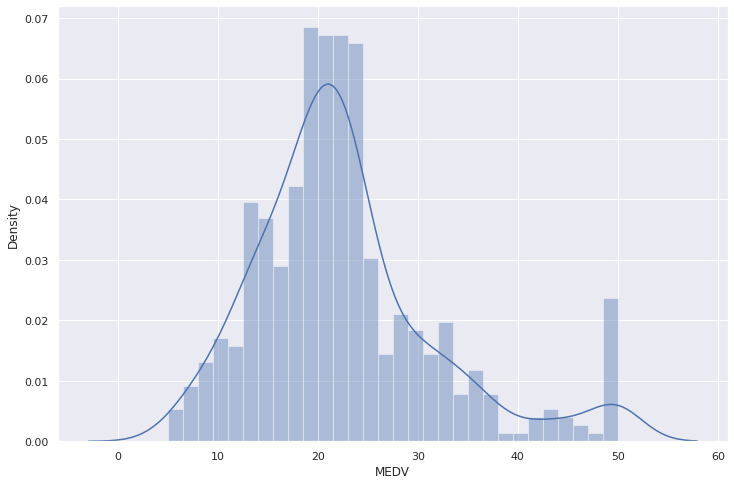

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

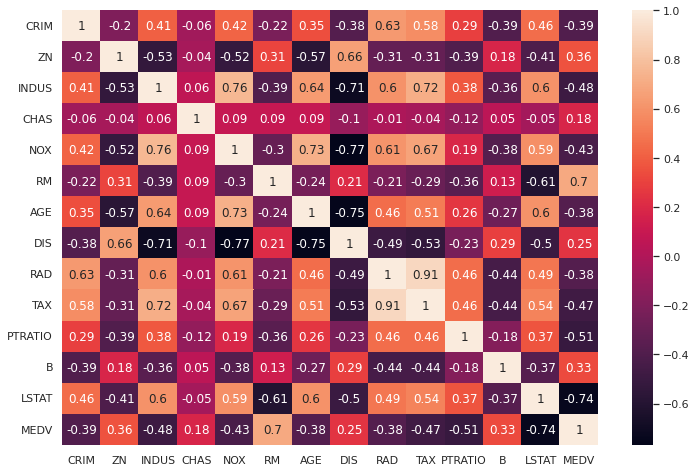

In [ ]:
# let's look at the correlation among columns
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

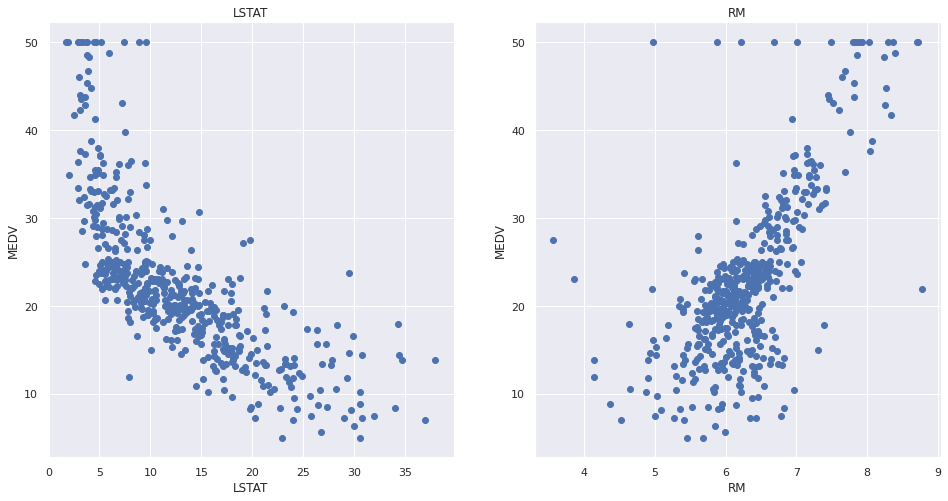

In [ ]:
plt.figure(figsize=(16, 8))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
# Preparing the data for training the model
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Model evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


Text(0, 0.5, 'Prediction')

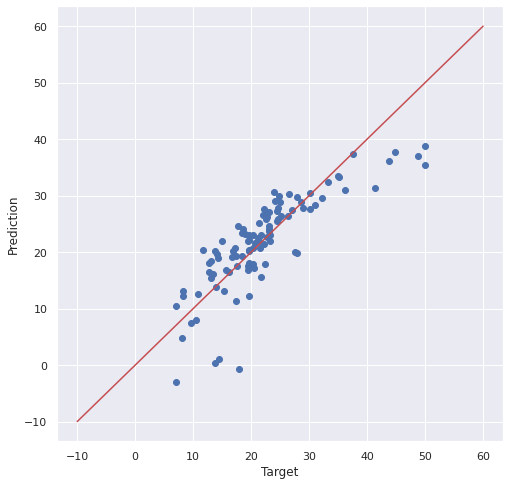

In [ ]:
plt.figure(figsize=(8, 8))
linex = np.arange(-10,61)
plt.plot(linex,linex,'r')
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')

In [ ]:
# This time let's use PTRATIO too
# Preparing the data for training the model
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = boston['MEDV']

The model performance for training set
--------------------------------------
RMSE is 5.303863193307931
R2 score is 0.6725214335656511


The model performance for testing set
--------------------------------------
RMSE is 4.9139375347640835
R2 score is 0.691587828074417


Text(0, 0.5, 'Prediction')

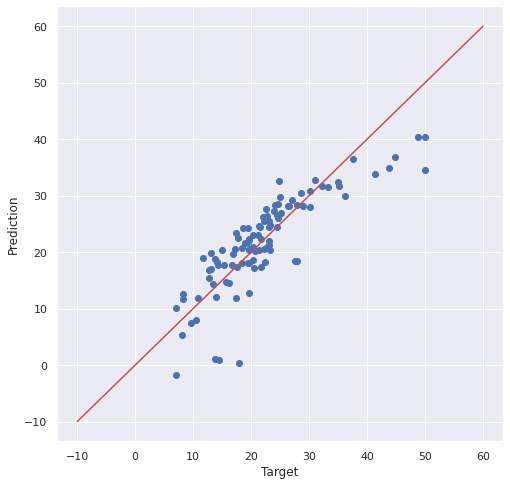

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
# Model evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

plt.figure(figsize=(8, 8))
linex = np.arange(-10,61)
plt.plot(linex,linex,'r')
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')

### Linear Regression with Linear Algebra

In [ ]:
from numpy.linalg import inv
beta = np.dot(inv(np.dot(X_train.T,X_train)),np.dot(X_train.T,Y_train))
Y_train_predict = np.dot(X_train,beta)
beta0 = (Y_train_predict-Y_train).mean()
print(beta,beta0)

[-0.55260131  6.11821223 -0.4893787 ] -0.08486344875407


Text(0.5, 1.0, 'Training')

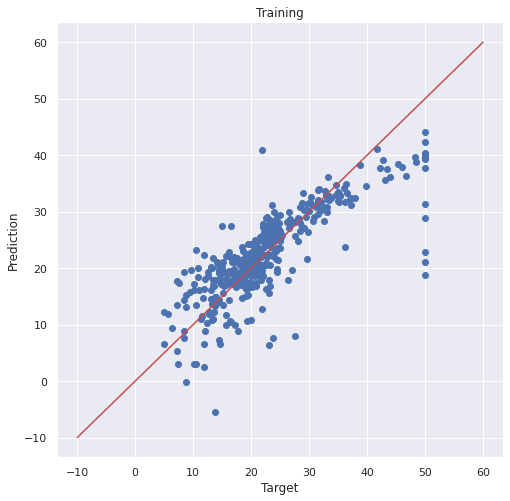

In [ ]:
plt.figure(figsize=(8, 8))
linex = np.arange(-10,61)
plt.plot(linex,linex,'r')
plt.scatter(Y_train,Y_train_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Training')

Text(0.5, 1.0, 'Testing')

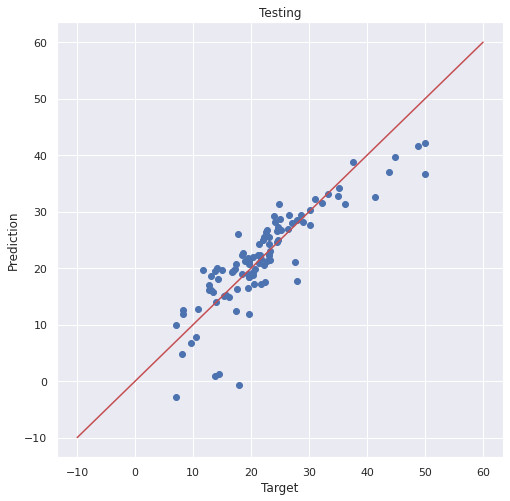

In [ ]:
Y_test_predict = np.dot(X_test,beta)+beta0
#
plt.figure(figsize=(8, 8))
linex = np.arange(-10,61)
plt.plot(linex,linex,'r')
plt.scatter(Y_test,Y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Testing')

In [ ]:
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for testing set
--------------------------------------
RMSE is 4.685455135936766
R2 score is 0.7196014171457333
